# Laboratorio 3: MLflow y Feast

## Ejercicio 1 - Configuración del Entorno

### 1.1 Instalación de Dependencias

In [1]:
# Se define un entorno de Python e instala las dependencias necesarias
# desde un archivo requirements.txt ubicado en el mismo directorio que este script.
#%pip install -r requirements.txt
print("Dependencias instaladas correctamente.")

Dependencias instaladas correctamente.


### 1.2 Verificación de Instalación

In [2]:
try:
    # Importar las dependencias para verificar la instalación
    import numpy as np
    import pandas as pd
    import sklearn
    import mlflow
    import feast
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("Todas las dependencias se han instalado correctamente.")

    # Versiones de las dependencias
    print(f"MLflow version: {mlflow.__version__}")
    print(f"Feast version: {feast.__version__}")

except ImportError as e:
    print(f"Error al importar una dependencia: {e}")

Todas las dependencias se han instalado correctamente.
MLflow version: 3.5.0
Feast version: 0.47.0


## Ejercicio 2 - Carga y Exploración de Datos

### 2.1 Carga del Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar el dataset de California Housing
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()

# Renombrar las columnas a nombres apropiados en español
df.rename(columns={
    "MedInc": "ingreso_medio",
    "HouseAge": "edad_vivienda",
    "AveRooms": "habitaciones",
    "AveBedrms": "dormitorios",
    "Population": "poblacion",
    "AveOccup": "ocupantes",
    "Latitude": "latitud",
    "Longitude": "longitud",
    "MedHouseVal": "valor_medio"
}, inplace=True)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
display(df.head())
# Mostrar información básica del DataFrame
print("\n--- Información del DataFrame ---")
print(f"- Cantidad de variables: {df.shape[1]}")
print(f"- Cantidad de registros: {df.shape[0]}")
print("\n--- Descripción básica de los datos ---")
df.info(memory_usage=False, verbose=True)

Primeras filas del DataFrame:


,ingreso_medio,edad_vivienda,habitaciones,dormitorios,poblacion,ocupantes,latitud,longitud,valor_medio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



--- Información del DataFrame ---
- Cantidad de variables: 9
- Cantidad de registros: 20640

--- Descripción básica de los datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ingreso_medio  20640 non-null  float64
 1   edad_vivienda  20640 non-null  float64
 2   habitaciones   20640 non-null  float64
 3   dormitorios    20640 non-null  float64
 4   poblacion      20640 non-null  float64
 5   ocupantes      20640 non-null  float64
 6   latitud        20640 non-null  float64
 7   longitud       20640 non-null  float64
 8   valor_medio    20640 non-null  float64
dtypes: float64(9)

El conjunto de datos cuenta con un total de 9 características y 20,640 registros. De las características presentes en el conjunto de datos, todas son númericas. No hay de tipo categórico.

### 2.2 Análisis Exploratorio

In [4]:
# Estadísticas descriptivas
print("\n--- Estadísticas Descriptivas ---")
display(df.describe().T)


--- Estadísticas Descriptivas ---


,count,mean,std,min,25%,50%,75%,max
ingreso_medio,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
edad_vivienda,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
habitaciones,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
dormitorios,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
poblacion,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
ocupantes,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
latitud,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
longitud,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
valor_medio,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


- El ingreso medio de los hogares es de **3.87 (≈38,700 USD)**, con alta variabilidad (std=1.9). Esto indica zonas con ingresos muy diferentes.
- La edad promedio de las viviendas es de **28.6 años**, con un rango amplio (1 a 52), lo que refleja tanto zonas nuevas como barrios antiguos.
- El número promedio de habitaciones por vivienda es **5.43**, pero con valores máximos atípicos (141.9), señal de posibles registros con subdivisiones poco representativas.
- Las variables de población y ocupantes muestran **alta dispersión y valores extremos**, especialmente “ocupantes”, lo que podría indicar outliers.
- El valor medio de las viviendas es de **2.07 (≈207,000 USD)**, con asimetría positiva y concentración hacia valores bajos y medios.


In [5]:
# Resumen de valores faltantes y duplicados
print("=== Resumen de calidad del dataset ===")

total_rows = len(df)

# Faltantes
faltantes = df.isnull().sum()
faltantes_pct = df.isnull().mean() * 100

# Duplicados (marcados por fila completa)
duplicados_total = df.duplicated().sum()
duplicados_pct = 100 * duplicados_total / total_rows

# Tabla resumen por columna
resumen = pd.DataFrame({
    "Faltantes": faltantes,
    "Faltantes_%": faltantes_pct.round(2),
})


display(resumen.style.format({"Faltantes_%": "{:.2f}%"}))

print(f"\nTotal de registros: {total_rows}")
print(f"Duplicados totales: {duplicados_total} ({duplicados_pct:.2f}%)")

=== Resumen de calidad del dataset ===


,Faltantes,Faltantes_%
ingreso_medio,0,0.00%
edad_vivienda,0,0.00%
habitaciones,0,0.00%
dormitorios,0,0.00%
poblacion,0,0.00%
ocupantes,0,0.00%
latitud,0,0.00%
longitud,0,0.00%
valor_medio,0,0.00%



Total de registros: 20640
Duplicados totales: 0 (0.00%)


No existen **valores faltantes ni duplicados** en ninguna variable.

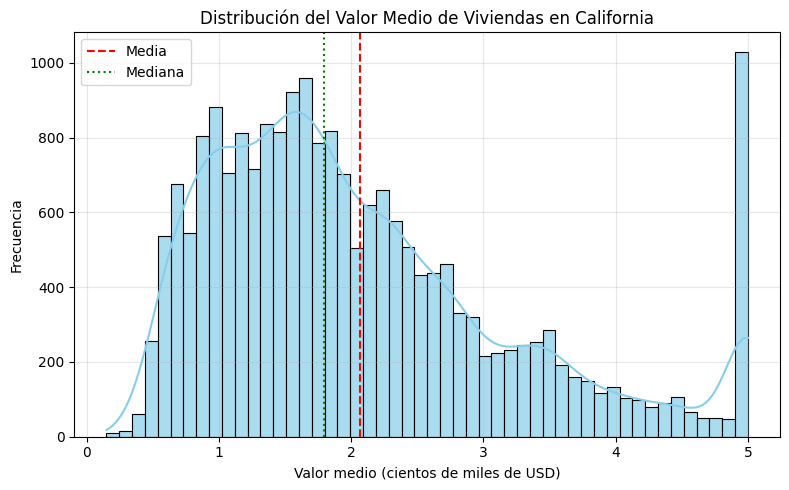

In [6]:
# Visualización de la distribución del valor medio de las viviendas
plt.figure(figsize=(8,5))
sns.histplot(df['valor_medio'], bins=50, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución del Valor Medio de Viviendas en California', fontsize=12)
plt.xlabel('Valor medio (cientos de miles de USD)')
plt.ylabel('Frecuencia')
plt.axvline(df['valor_medio'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['valor_medio'].median(), color='green', linestyle=':', label='Mediana')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- La distribución del valor medio de las viviendas es **asimétrica a la derecha**, con mayor concentración entre 1.0 y 2.5 (≈100–250 mil USD).
- La **media (≈2.07)** está ligeramente por encima de la **mediana (≈1.8)**, lo que confirma esa asimetría.
- Existe una acumulación de valores máximos en 5.0, que representa el **límite superior del dataset** (truncamiento), no valores reales mayores.
- La forma general sugiere que la mayoría de las viviendas pertenecen a segmentos de precio medio-bajo, con pocas zonas de alto valor.


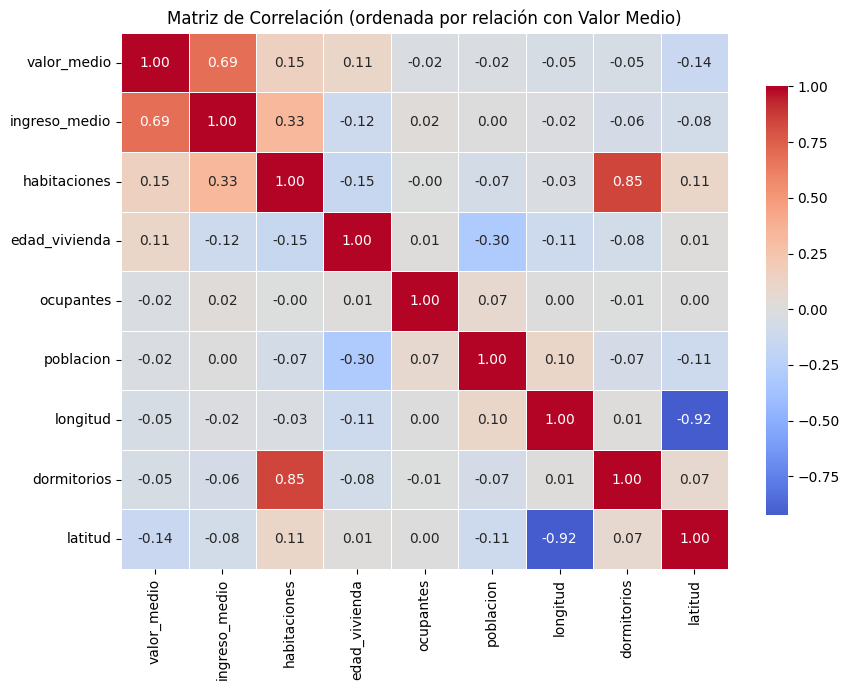

In [7]:
# Matriz de correlación de las variables numéricas
plt.figure(figsize=(9,7))

# Correlaciones numéricas
corr = df.corr(numeric_only=True)

# Ordenar columnas según correlación con la variable objetivo (valor_medio)
target = 'valor_medio'
corr_target = corr[target].drop(target).sort_values(ascending=False)
ordered_cols = [target] + corr_target.index.tolist()

# Mapa de calor
sns.heatmap(
    corr.loc[ordered_cols, ordered_cols],
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Matriz de Correlación (ordenada por relación con Valor Medio)', fontsize=12)
plt.tight_layout()
plt.show()

- La variable **ingreso_medio** tiene la **correlación positiva más fuerte con el valor medio de la vivienda (r=0.69)**, confirmando que los ingresos son el principal predictor del precio.
- **Número de habitaciones** tiene correlación moderada con el valor medio (r≈0.15), mientras que “edad_vivienda”, “población” y “ocupantes” muestran relaciones muy débiles.
- Existe **colinealidad fuerte entre habitaciones y dormitorios (r≈0.85)**, lo que implica que solo una de estas variables debería mantenerse en modelos lineales para evitar redundancia.